In [1]:
import math
R=8.314

1-4) 天然ガス(純粋なメタンとする)1000 kmol/h、水 3000 kmol/h を反応させるプロセス
を考える。
A) 反応器を加熱するバーナーに供給する天然ガスの流量を求めよ。

In [2]:
T0=25+273.15
def Enthalpy(T,p):
    a=p[0];b=p[1];c=p[2];d=p[3];hf=p[4]
    Qent=hf+(a*(T-T0)+1/2*b*(T**2-T0**2)+1/3*c*(T**3-T0**3)+1/4*d*(T**4-T0**4))
    return Qent

pO2=(28.107,-3.680*10**-6,1.746*10**-5,-1.065*10**-8,0)
pN2=(31.151,-1.357*10**-2,2.680*10**-5,-1.168*10**-8,0)
pH2=(27.144,9.27*10**-3,-1.381*10**-5,7.645*10**-9,0)
pH2O=(32.244,1.924*10**-3,1.056*10**-5,-3.597*10**-9,-242.0*10**3)
pCO=(30.871,-1.285*10**-2,2.789*10**-5,-1.272*10**-8,-110.6*10**3)
pCO2=(19.796,7.344*10**-2,-5.602*10**-5,1.715*10**-8,-393.8*10**3)
pCH4=(19.252,5.213*10**-2,1.197*10**-5,-1.132*10**-8,-74.9*10**3)
pCO2=(19.796,7.344*10**-2,-5.602*10**-5,1.715*10**-8,-393.8*10**3)

Tout=960+273.15
total=(1*Enthalpy(Tout,pCO2)+2*Enthalpy(Tout,pH2O)+0.1*Enthalpy(Tout,pO2)+8.4*Enthalpy(Tout,pN2))\
      -(1*Enthalpy(30+273.15,pCH4)+2.1*Enthalpy(300+273.15,pO2)+8.4*Enthalpy(300+273.15,pN2))

FCH4=0.109558105*10**6
FH2O=1.972546142*10**6
FCO=0.753429931*10**6
FH2=2.808337647*10**6
FCO2=0.137011964*10**6

Tout2=855+273.15
total2=(FCH4*Enthalpy(Tout2,pCH4)+FH2O*Enthalpy(Tout2,pH2O)+FCO*Enthalpy(Tout2,pCO)+FH2*Enthalpy(Tout2,pH2)\
      +FCO2*Enthalpy(Tout2,pCO2))-(10**6*Enthalpy(30+273.15,pCH4)+3*10**6*Enthalpy(450+273.15,pH2O))
print("反応器を加熱するバーナーに供給する天然ガスの流量= ",-total2/total,"[mol/h]")


反応器を加熱するバーナーに供給する天然ガスの流量=  563155.6142614955 [mol/h]


B) 反応によって得られた合成ガスから熱エネルギーを回収するため、4.8MPa、30°Cの
水を加熱して 360°Cの水蒸気とする。熱の損失を無視し、合成ガスが 360°Cまで冷却
されるとして得られる水蒸気の最大流量を求めよ。

In [3]:
A = 23.19637
B = 3816.44
C = -46.13
T=B/(A-math.log(4.8*10**6))-C
print("沸点=",T,"K")

ΔHv=Enthalpy(360+273.15,pH2O)-Enthalpy(T,pH2O)
#######################################
Pc = 22.04*10**6
Tc = 647.3 
Tr=T/Tc
ΔZvap=(1-4.8*10**6/Pc/Tr**3)**0.5
ΔHvap=R*ΔZvap*T**2*(B/(C+T)**2)

######################################
T0=30+273.15

Pvap_T0=math.exp(A-B/(C+30+273.15))
Pvap_T=math.exp(A-B/(C+T))

Tr=T0/Tc
ΔZvap=(1-Pvap_T0/Pc/Tr**3)**0.5
ΔHvap_T0=R*ΔZvap*T0**2*(B/(C+T0)**2)

Tr=T/Tc
ΔZvap=(1-Pvap_T/Pc/Tr**3)**0.5
ΔHvap_T=R*ΔZvap*T**2*(B/(C+T)**2)

ΔHl=(Enthalpy(T,pH2O)-Enthalpy(T0,pH2O)-(Pvap_T-Pvap_T0)*18*10**-6-(ΔHvap_T-ΔHvap_T0))

ΔHtotalH2O=ΔHv+ΔHvap+ΔHl

#################################################
Tout2=855+273.15
Tout1=360+273.15
ΔHmix=(FCH4*Enthalpy(Tout2,pCH4)+FH2O*Enthalpy(Tout2,pH2O)+FCO*Enthalpy(Tout2,pCO)+FH2*Enthalpy(Tout2,pH2)+FCO2*Enthalpy(Tout2,pCO2))\
     -(FCH4*Enthalpy(Tout1,pCH4)+FH2O*Enthalpy(Tout1,pH2O)+FCO*Enthalpy(Tout1,pCO)+FH2*Enthalpy(Tout1,pH2)+FCO2*Enthalpy(Tout1,pCO2))
print("水蒸気の最大流量",ΔHmix/ΔHtotalH2O,"mol/h")

沸点= 534.6503575920245 K
水蒸気の最大流量 1791495.5772281934 mol/h


C) バーナーの排ガスは反応用の水蒸気を 210°Cから 450°Cまで加熱するために利用さ
れる。その後 B)と同様に水を加熱して 4.8MPa、360°Cの水蒸気とすることで、熱の
回収を行うとする。熱の損失を無視し、得られる水蒸気の最大流量を求めよ。

In [4]:
Ffuel=563155.6142614955
Tburner1=960+273.15
Tburner2=360+273.15
ΔHburnertotal=(1*Ffuel*Enthalpy(Tburner1,pCO2)+2*Ffuel*Enthalpy(Tburner1,pH2O)+0.1*Ffuel*Enthalpy(Tburner1,pO2)+8.4*Ffuel*Enthalpy(Tburner1,pN2))\
      -(1*Ffuel*Enthalpy(Tburner2,pCO2)+2*Ffuel*Enthalpy(Tburner2,pH2O)+0.1*Ffuel*Enthalpy(Tburner2,pO2)+8.4*Ffuel*Enthalpy(Tburner2,pN2))

ΔHvH2O=3*10**6*(Enthalpy(450+273.15,pH2O)-Enthalpy(210+273.15,pH2O))
print("得られる水蒸気の最大流量=",(ΔHburnertotal-ΔHvH2O)/ΔHtotalH2O,"mol/h")

得られる水蒸気の最大流量= 2003386.3116067115 mol/h


D) 反応ガスを 35°Cまで冷却する。凝縮する水の量と気相成分の成分ごとの流量を求め
よ。

In [5]:
A = 23.19637
B = 3816.44
C = -46.13
P35_H2O_gas=math.exp(A-B/(C+35+273.15))
Ptotal=1.6*10**6

FCH4=0.109558105*10**6
FH2O=1.972546142*10**6
FCO=0.753429931*10**6
FH2=2.808337647*10**6
FCO2=0.137011964*10**6

nH2O_gas=P35_H2O_gas/(Ptotal-P35_H2O_gas)*(FCH4+FCO+FH2+FCO2)
nH2O_liquid=FH2O-nH2O_gas
print("凝縮する水の量=",nH2O_liquid,"mol/h")

FH2O=1.972546142*10**6-nH2O_liquid

print("FCH4=",FCH4,"mol/h")
print("FH2O=",FH2O,"mol/h")
print("FCO=",FCO,"mol/h")
print("FH2=",FH2,"mol/h")
print("FCO2=",FCO2,"mol/h")



凝縮する水の量= 1959164.8397100852 mol/h
FCH4= 109558.105 mol/h
FH2O= 13381.302289914805 mol/h
FCO= 753429.931 mol/h
FH2= 2808337.647 mol/h
FCO2= 137011.964 mol/h


E) 気相成分を断熱的に 7.5MPa まで圧縮するサイクルが必要とする動力(時間当たり
の仕事)と等温的に圧縮する サイク ルが必要とする動力を比 較 せよ。ただし
γ = c p /c v の値は常に 1.4 とし、水蒸気の凝縮は無視して良い。実際のプロセスでは圧
縮は2段階で行われるが、その理由を考察せよ。

In [6]:
T1=35+273.15
P1=1.6*10**6
P2=7.5*10**6

γ=1.4   
R=8.314

T2=P2**(1-1/γ)/(P1**(1-1/γ)/T1)

Ftotal=FCH4+FH2O+FCO+FH2+FCO2
V1=R*T1*Ftotal/P1
V2=R*T2*Ftotal/P2
Wadiabatic=Ftotal*R*(T2-T1)/(γ-1)+(P2*V2-P1*V1)
print("断熱的に圧縮の動力=",Wadiabatic/3600,"W")
##############################################
V1=R*T1*Ftotal/P1
V2=R*T1*Ftotal/P2
Wisothermal=Ftotal*R*T1*math.log(P2/P1)+(P2*V2-P1*V1)
print("等温的に圧縮の動力=",Wisothermal/3600,"W")

断熱的に圧縮の動力= 5281986.930624441 W
等温的に圧縮の動力= 4201734.815227918 W


F) 上記 A)、D)、E)を反応器圧力 1.2MPa、1.6MPa、2.0MPa に対し、反応器温度を
750°C~950°Cに変化させて計算せよ。反応温度に対し、各反応圧力をパラメータと
して(1)反応器におけるメタンの転化率、(2)バーナーに供給する天然ガスの流量、(3)
圧縮動力(小さい方) の変化を図示すること。このプロセスの実用化に際し、どの
ような反応温度、反応圧力が望ましいか、考察せよ。

In [7]:
T0=25+273.15
def FunctionA_D_E(T,P):
    
    Te=T+273.15
    Pe=P/101325
    A1=1.1769*10**4
    B1=13.1927
    Kp1=10**(-A1/Te+B1)
    A2=-1.1978*10**3
    B2=-1.6485
    Kp2=10**(-A2/Te+B2)

    F0CH4=1.0*10**6
    F0H2O=3.0*10**6
    F0CO=0.0
    F0H2=0.0
    F0CO2=0.0
    F0TOTAL=F0CH4+F0H2O+F0CO+F0H2+F0CO2

    F2CH4=0.0
    F2H2O=0.0
    F2CO=0.0
    F2H2=0.0
    F2CO2=0.0
    F2total=F2CH4+F2H2O+F2CO+F2H2+F2CO2

    n1min=0.0
    n1max=F0CH4

    while n1max-n1min>10**-6:  
        n1=(n1min+n1max)/2.0
        F1CH4=F0CH4-n1
        F1H2O=F0H2O-n1
        F1CO=F0CO+n1
        F1H2=F0H2+3*n1
        F1CO2=F0CO2
        Ftotal=F1CH4+F1H2O+F1CO+F1H2+F1CO2
        n2min=0
        n2max=n1

        while n2max-n2min>10**(-6):  
            n2=(n2max+n2min)/2
            FCH4=F1CH4
            FH2O=F1H2O-n2
            FCO=F1CO-n2
            FH2=F1H2+n2
            FCO2=F1CO2+n2
            F2total=FCH4+FH2O+FCO+FH2+FCO2

            yCH4=FCH4/F2total
            yH2O=FH2O/F2total
            yCO=FCO/F2total
            yH2=FH2/F2total
            yCO2=FCO2/F2total
            Kp1Calc=yCO*yH2**3/(yCH4*yH2O)*Pe**2
            Kp2Calc=yCO2*yH2/(yCO*yH2O)
            if Kp2Calc>Kp2:
                n2max=n2
            else:
                n2min=n2
        if Kp1Calc>Kp1:
            n1max=n1
        else:
            n1min=n1
    #########################################################
    Tout=T+105+273.15
    total=(1*Enthalpy(Tout,pCO2)+2*Enthalpy(Tout,pH2O)+0.1*Enthalpy(Tout,pO2)+8.4*Enthalpy(Tout,pN2))\
      -(1*Enthalpy(30+273.15,pCH4)+2.1*Enthalpy(300+273.15,pO2)+8.4*Enthalpy(300+273.15,pN2))
    
    Tout2=T+273.15
    total2=(FCH4*Enthalpy(Tout2,pCH4)+FH2O*Enthalpy(Tout2,pH2O)+FCO*Enthalpy(Tout2,pCO)+FH2*Enthalpy(Tout2,pH2)\
          +FCO2*Enthalpy(Tout2,pCO2))-(10**6*Enthalpy(30+273.15,pCH4)+3*10**6*Enthalpy(450+273.15,pH2O))

    #########################################################
    Ptotal=P

    nH2O_gas=P35_H2O_gas/(Ptotal-P35_H2O_gas)*(FCH4+FCO+FH2+FCO2)
    nH2O_liquid=FH2O-nH2O_gas

    FH2O=FH2O-nH2O_liquid

    #####################################################
    T1=35+273.15
    P1=P
    P2=7.5*10**6
    γ=1.4   
    R=8.314

    T2=P2**(1-1/γ)/(P1**(1-1/γ)/T1)

    Ftotal=FCH4+FH2O+FCO+FH2+FCO2
    V1=R*T1*Ftotal/P1
    V2=R*T2*Ftotal/P2
    Wadiabatic=Ftotal*R*(T2-T1)/(γ-1)+(P2*V2-P1*V1)

    ##############################################
    V1=R*T1*Ftotal/P1
    V2=R*T1*Ftotal/P2
    Wisothermal=Ftotal*R*T1*math.log(P2/P1)+(P2*V2-P1*V1)

    #############################################
    conversionrate=(10**6-FCH4)/10**6

    return T,P,-total2/total,nH2O_liquid,FCH4,FH2O,FCO,FH2,FCO2,Wadiabatic/3600,Wisothermal/3600,conversionrate

FunctionA_D_E(750,1.6*10**6)[0:12]

(750,
 1600000.0,
 378403.63916726655,
 2182604.404579168,
 359414.4572407459,
 10849.269130795728,
 474624.759228472,
 2087717.4118085443,
 165960.7835307821,
 4282520.229655011,
 3406675.2875763066,
 0.6405855427592541)

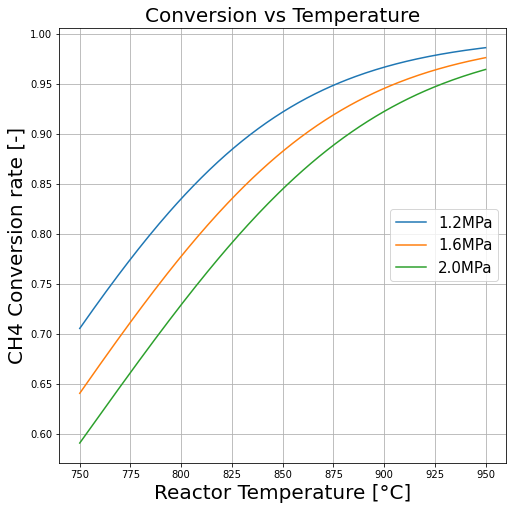

In [8]:
import numpy as np
import matplotlib.pyplot as plt
P=1.6*10**6
i=0
x1_2=[FunctionA_D_E(750,1.2*10**6)[11]]
x1_6=[FunctionA_D_E(750,1.6*10**6)[11]]
x2_0=[FunctionA_D_E(750,2.0*10**6)[11]]
while i<200:
    x1_2.append(0)
    x1_6.append(0)
    x2_0.append(0)
    i=i+1
    T=750+i
    x1_2[i]=FunctionA_D_E(T,1.2*10**6)[11]
    x1_6[i]=FunctionA_D_E(T,1.6*10**6)[11]
    x2_0[i]=FunctionA_D_E(T,2.0*10**6)[11]

T=np.linspace(750,950,201)

plt.figure(figsize=(8,8))
plt.plot(T,x1_2,label='1.2MPa')
plt.plot(T,x1_6,label='1.6MPa')
plt.plot(T,x2_0,label='2.0MPa')
plt.grid()
plt.title('Conversion vs Temperature', fontsize=20)
plt.xlabel('Reactor Temperature [°C]', fontsize=20)
plt.ylabel('CH4 Conversion rate [-]', fontsize=20)
plt.legend(loc=7,fontsize=15)
plt.savefig('xvst.png')
plt.show()




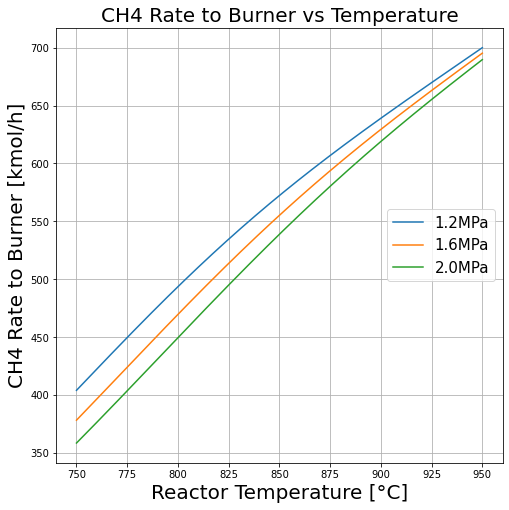

In [9]:
import numpy as np
import matplotlib.pyplot as plt
i=0
x1_2=[FunctionA_D_E(750,1.2*10**6)[2]/10**3]
x1_6=[FunctionA_D_E(750,1.6*10**6)[2]/10**3]
x2_0=[FunctionA_D_E(750,2.0*10**6)[2]/10**3]
while i<200:
    x1_2.append(0)
    x1_6.append(0)
    x2_0.append(0)
    i=i+1
    T=750+i
    x1_2[i]=FunctionA_D_E(T,1.2*10**6)[2]/10**3
    x1_6[i]=FunctionA_D_E(T,1.6*10**6)[2]/10**3
    x2_0[i]=FunctionA_D_E(T,2.0*10**6)[2]/10**3

T=np.linspace(750,950,201)

plt.figure(figsize=(8,8))
plt.plot(T,x1_2,label='1.2MPa')
plt.plot(T,x1_6,label='1.6MPa')
plt.plot(T,x2_0,label='2.0MPa')
plt.grid()
plt.title('CH4 Rate to Burner vs Temperature', fontsize=20)
plt.xlabel('Reactor Temperature [°C]', fontsize=20)
plt.ylabel('CH4 Rate to Burner [kmol/h]', fontsize=20)
plt.legend(loc=7,fontsize=15)
plt.savefig('ch4vst.png')
plt.show()

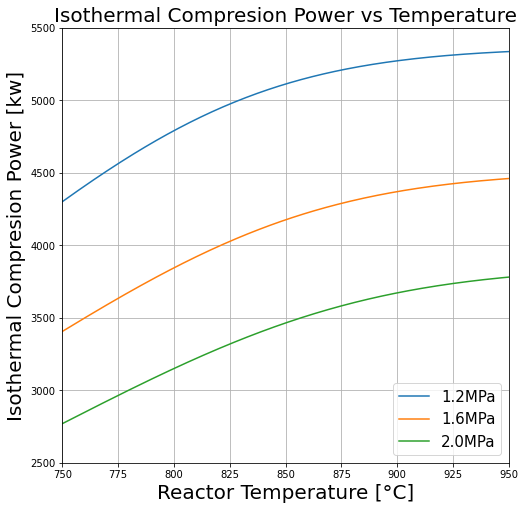

In [10]:
import numpy as np
import matplotlib.pyplot as plt
i=0
x1_2=[FunctionA_D_E(750,1.2*10**6)[10]/10**3]
x1_6=[FunctionA_D_E(750,1.6*10**6)[10]/10**3]
x2_0=[FunctionA_D_E(750,2.0*10**6)[10]/10**3]
while i<200:
    x1_2.append(0)
    x1_6.append(0)
    x2_0.append(0)
    i=i+1
    T=750+i
    x1_2[i]=FunctionA_D_E(T,1.2*10**6)[10]/10**3
    x1_6[i]=FunctionA_D_E(T,1.6*10**6)[10]/10**3
    x2_0[i]=FunctionA_D_E(T,2.0*10**6)[10]/10**3

T=np.linspace(750,950,201)

plt.figure(figsize=(8,8))
plt.plot(T,x1_2,label='1.2MPa')
plt.plot(T,x1_6,label='1.6MPa')
plt.plot(T,x2_0,label='2.0MPa')
plt.grid()
plt.title('Isothermal Compresion Power vs Temperature', fontsize=20)
plt.xlabel('Reactor Temperature [°C]', fontsize=20)
plt.ylabel('Isothermal Compresion Power [kw]', fontsize=20)
plt.legend(loc=4,fontsize=15)
plt.axis([750, 950, 2500, 5500])
plt.savefig('isotthermalpowervst.png')
plt.show()